Training curves

In [13]:
import os
import numpy as np
import pandas as pd
from glob import glob

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [3]:
logs_path = os.path.join("..", "output")

IcebergInceptionV4

In [20]:
csv_files = glob(os.path.join(logs_path, 'training_IcebergInceptionV4_20171203_2356/**/*log.csv'), recursive=True) 

In [23]:
for i, f in enumerate(csv_files):
    print(os.path.basename(os.path.dirname(f)))

fold_6
fold_5
fold_2
fold_4
fold_0
fold_3
fold_1


In [24]:
def draw_curves(name, path):

    logs = {}
    csv_files = glob(os.path.join(logs_path, '%s/**/*log.csv' % path), recursive=True) 
    
    for i, f in enumerate(csv_files):
        logs["%s_%s" % (name, os.path.basename(os.path.dirname(f)))] = f

    dfs = []
    for name in logs:
        dfs.append(pd.read_csv(logs[name], index_col='epoch'))

    plt.figure(figsize=(16, 4))
    var_name = 'train_loss'
    plt.subplot(121)
    plt.title("Training loss")
    for df, log_name in zip(dfs, logs):
        plt.plot(df.index.values, df[var_name].values, '.-', label=log_name)    
    plt.legend()
    plt.ylim([0.0, 1.5])    

    var_name = 'val_loss'
    plt.subplot(122)
    plt.title("Validation loss")
    for df, log_name in zip(dfs, logs):
        plt.plot(df.index.values, df[var_name].values, '.-', label=log_name)    
    plt.legend()
    plt.ylim([0.0, 1.5])


    plt.figure(figsize=(16, 4))
    var_name = 'train_loss'
    plt.subplot(121)
    plt.title("Training loss")
    for df, log_name in zip(dfs, logs):
        plt.plot(df.index.values, df[var_name].values, '.-', label=log_name)    
    plt.legend()
    plt.ylim([0.0, 0.3])

    var_name = 'val_loss'
    plt.subplot(122)
    plt.title("Validation loss")
    for df, log_name in zip(dfs, logs):
        plt.plot(df.index.values, df[var_name].values, '.-', label=log_name)    
    plt.legend()
    plt.ylim([0.0, 0.3])

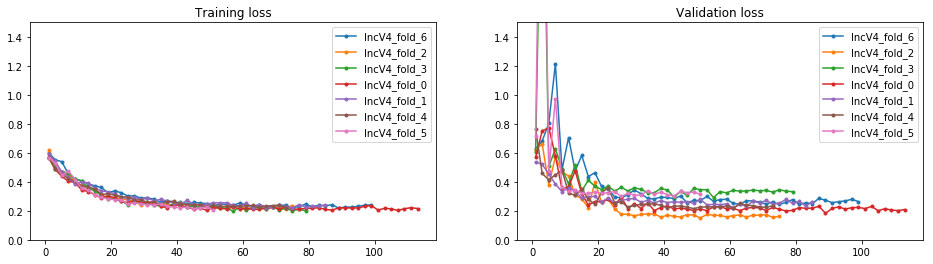

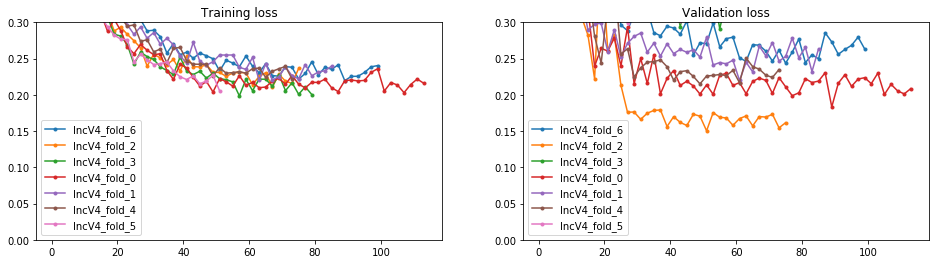

In [25]:
draw_curves('IncV4', 'training_IcebergInceptionV4_20171203_2356')

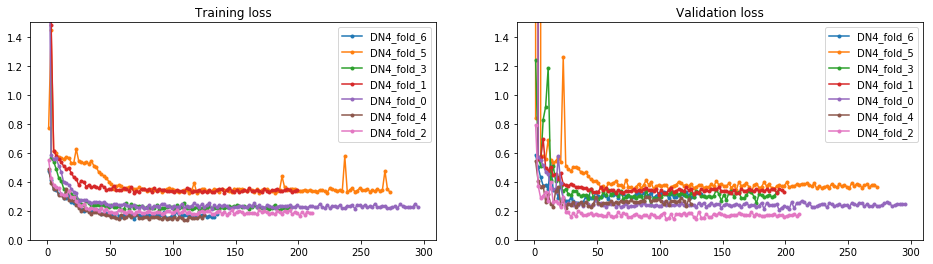

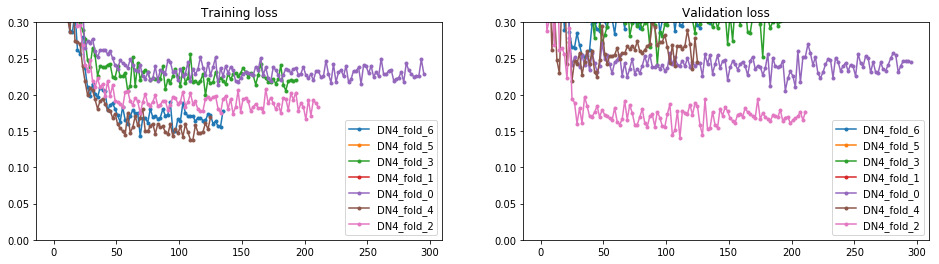

In [26]:
draw_curves('DN4', 'training_IcebergDenseNet4_20171208_0005')

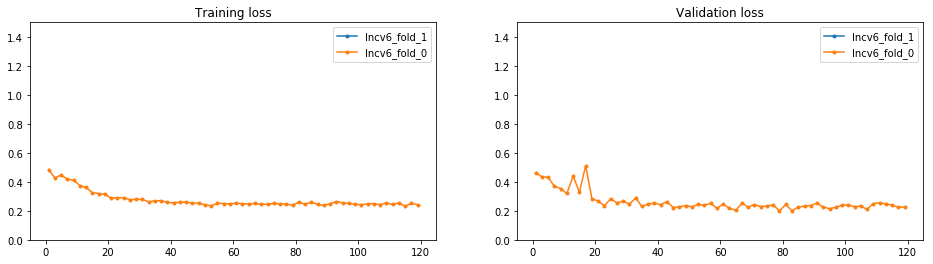

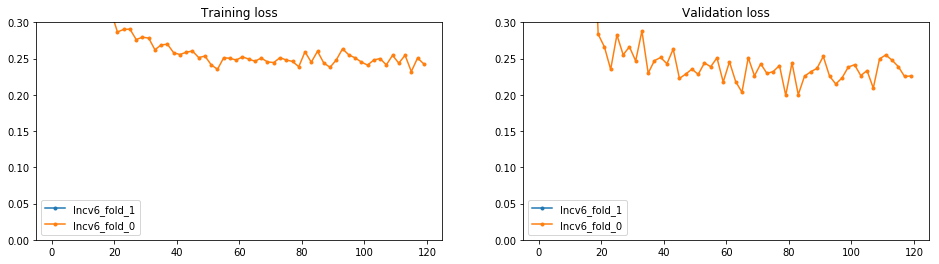

In [47]:
draw_curves('Incv6', 'training_IcebergInceptionV6_20171208_2046')

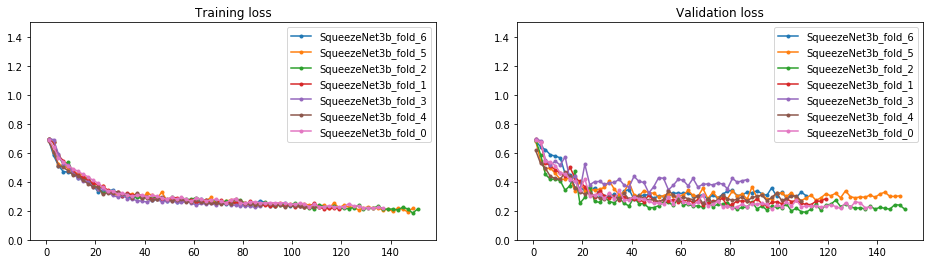

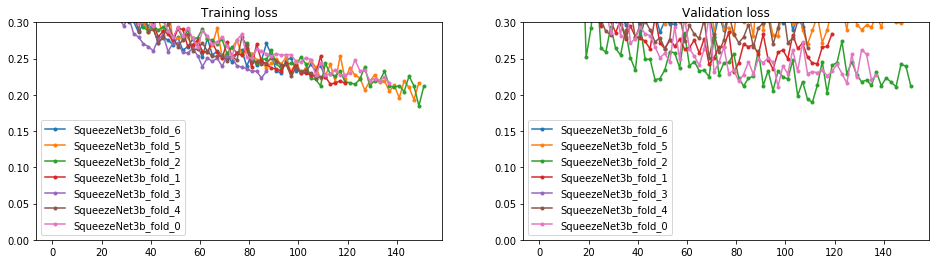

In [49]:
draw_curves('SqueezeNet3b', 'training_IcebergVGGv2_20171208_2356')

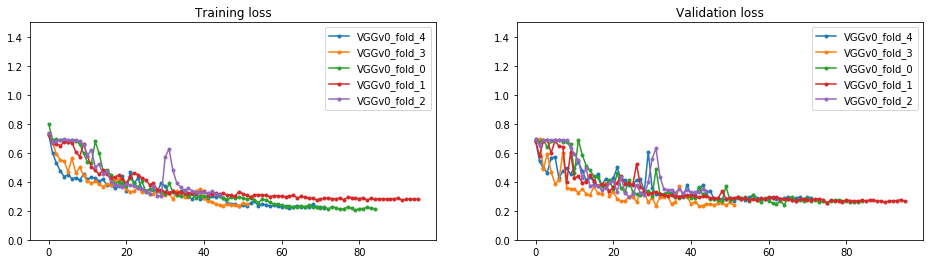

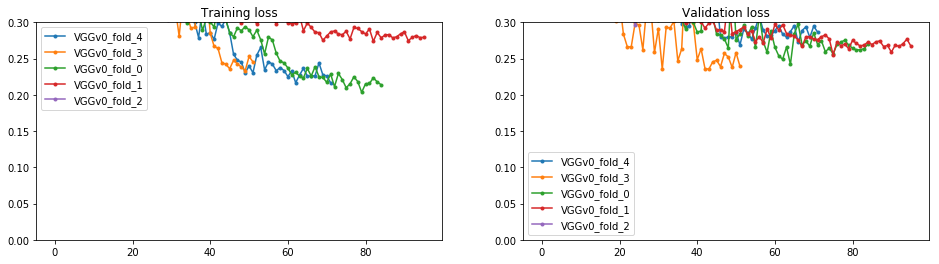

In [67]:
draw_curves('VGGv0', 'training_IcebergVGGv0_20171209_0943')

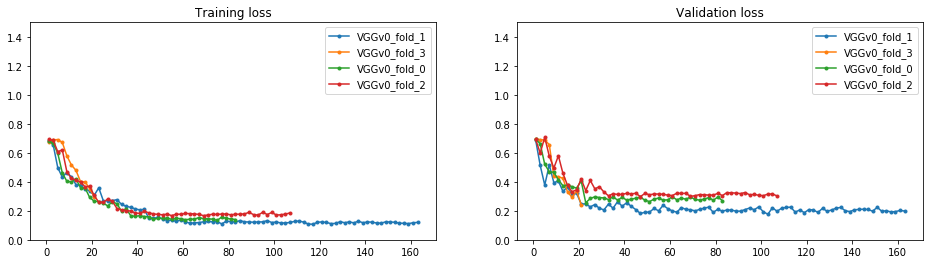

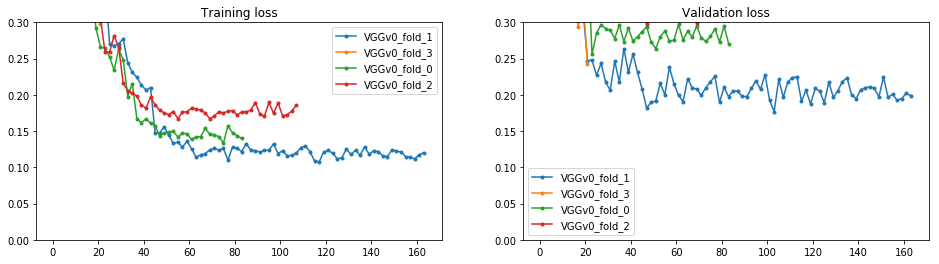

In [90]:
draw_curves('VGGv0', 'training_IcebergVGGv0_20171209_1049')